In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [105]:
data = pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


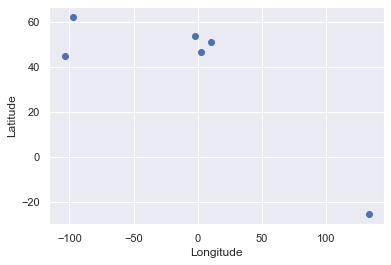

In [106]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [107]:
#iloc method allows for dataframes to be sliced how you want
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [108]:
#In the KMeans method, specify the amount of clusters you will be using
kmeans = KMeans(3)

In [109]:
#fit method performs the clustering itself
kmeans.fit(x)

KMeans(n_clusters=3)

In [110]:
#fit_predict allows you to obtain the clusters for each prediction 
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [111]:
#original dataframe with extra column showing cluster to which observations belong
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


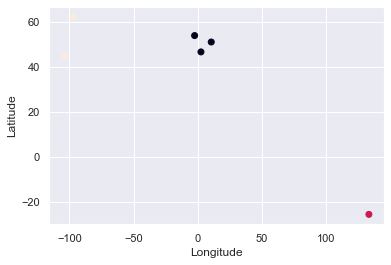

In [112]:
#Graph showing Observations, colored based on which cluster they belong to
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [113]:
data_mapped = data.copy()

In [114]:
data_mapped['Language'] = data_mapped['Language'].map({'English': 0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [115]:
x = data_mapped.iloc[:,1:4]

In [116]:
kmeans = KMeans(3)

In [117]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [118]:
identified_clusters_2  = kmeans.fit_predict(x)
identified_clusters_2

array([1, 1, 2, 2, 2, 0], dtype=int32)

In [119]:
data_with_clusters_2 = data.copy()
data_with_clusters_2['Cluster'] = identified_clusters_2
data_with_clusters_2['Language'] = data_with_clusters_2['Language'].map({'English':0, 'French':1, 'German':2})
data_with_clusters_2

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,2
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,0


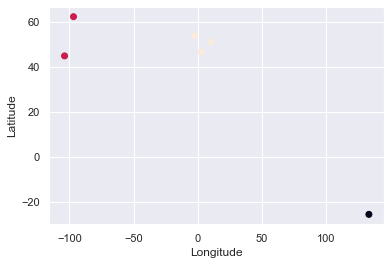

In [120]:
plt.scatter(data_with_clusters_2['Longitude'], data_with_clusters_2['Latitude'], c=data_with_clusters_2['Cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [121]:
#intertia_ method calculates the wcss
kmeans.inertia_

290.1052333333333

In [122]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]